In [1]:
import pandas as pd
import numpy as np
import re
import random
from datetime import datetime

# Reading the form responses
data = pd.read_csv('cleaned_routes.csv')
data

,ISB_Service,bus_stop_board,bus_stop_alight,day_of_the_week,time_start,travel_duration,frequency,punctuality,cleanliness,safety,coverage,crowdedness
0,D2,KR MRT,UTown,Monday,09:30:00,10 - 15 minutes,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,4.0
1,A1,KR MRT,LT27,Tuesday,07:50:00,< 5 minutes,Neutral,Satisfied,Satisfied,Satisfied,Satisfied,5.0
2,D2,UTown,Opp KR MRT,Friday,17:00:00,10 - 15 minutes,Neutral,Satisfied,Very Satisfied,Satisfied,Satisfied,4.0
3,A2,Opp KR MRT,Opp HSSML,Friday,11:40:00,10 - 15 minutes,Neutral,Satisfied,Satisfied,Neutral,Satisfied,4.0
4,A1,BIZ2,KR MRT,Wednesday,20:00:00,10 - 15 minutes,Satisfied,Satisfied,Satisfied,Neutral,Satisfied,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
239,A1,BIZ2,LT27,Monday,11:40:00,10 - 15 minutes,Neutral,Satisfied,Very Satisfied,Very Satisfied,Very Satisfied,5.0
240,A1,LT13,UTown,Wednesday,18:42:17,5 - 10 minutes,Dissatisfied,Very Satisfied,Very Satisfied,Very dissatisfied,Satisfied,1.0
241,D1,PGP Terminal,Opp KR MRT,Friday,18:55:00,10 - 15 minutes,Neutral,Neutral,Very Satisfied,Satisfied,Very dissatisfied,1.0
242,A1,KR MRT,COM3,Wednesday,09:30:00,10 - 15 minutes,Dissatisfied,Neutral,Satisfied,Satisfied,Satisfied,5.0


In [2]:
from sklearn.preprocessing import LabelEncoder

# Convert time_start to datetime format and then to minutes from midnight
data['time_start'] = pd.to_datetime(data['time_start'], format='%H:%M:%S')
data['time_start'] = data['time_start'].dt.hour * 60 + data['time_start'].dt.minute

# Encode categorical variables using Label Encoding
label_encoders = {}
for col in ['ISB_Service', 'bus_stop_board', 'bus_stop_alight', 'day_of_the_week','travel_duration']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Convert satisfaction levels to numerical values 
satisfaction_map = {'Very Satisfied': 5, 'Satisfied': 4, 'Neutral': 3, 'Dissatisfied': 2, 'Very Dissatisfied': 1}
for col in ['frequency', 'punctuality', 'cleanliness', 'safety', 'coverage']:
    data[col] = data[col].map(satisfaction_map)

In [3]:
from sklearn.preprocessing import StandardScaler

# Standardising time_start
scaler = StandardScaler()
data[['time_start']] = scaler.fit_transform(data[['time_start']])

In [4]:
data

,ISB_Service,bus_stop_board,bus_stop_alight,day_of_the_week,time_start,travel_duration,frequency,punctuality,cleanliness,safety,coverage,crowdedness
0,4,6,14,1,-1.026514,0,4.0,4.0,4.0,4.0,4.0,4.0
1,0,6,7,5,-1.475119,4,3.0,4.0,4.0,4.0,4.0,5.0
2,4,16,9,0,0.992207,0,3.0,4.0,5.0,4.0,4.0,4.0
3,1,12,8,0,-0.443328,0,3.0,4.0,4.0,3.0,4.0,4.0
4,0,0,6,6,1.799695,0,4.0,4.0,4.0,3.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
239,0,0,7,1,-0.443328,0,3.0,4.0,5.0,5.0,5.0,5.0
240,0,7,14,6,1.449784,3,2.0,5.0,5.0,NaN,4.0,1.0
241,3,14,9,0,1.508102,0,3.0,3.0,5.0,4.0,NaN,1.0
242,0,6,3,6,-1.026514,0,2.0,3.0,4.0,4.0,4.0,5.0


Mean Absolute Error: 0.9608163265306122
Mean Squared Error: 1.6404979591836735
Root Mean Squared Error: 1.2808192531281193
R-squared (R²): 0.10317950819672128


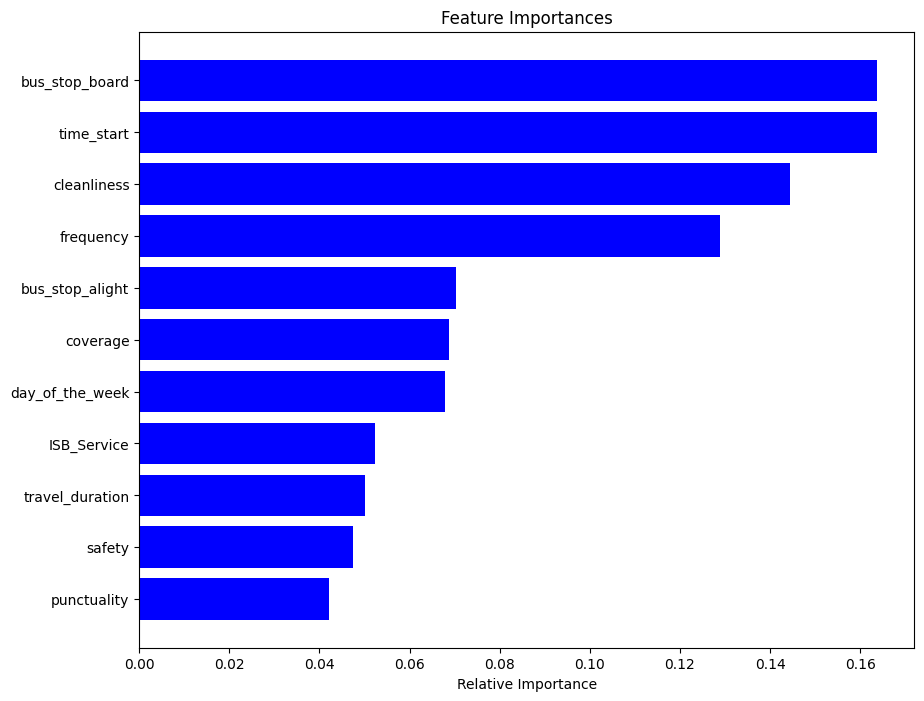

In [5]:
# Random Forest Regressor 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split data into features and target 
X = data.drop(columns=['crowdedness'])
y = data['crowdedness']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared (R²): {r2}")

# Display feature importance
import matplotlib.pyplot as plt

feature_importances = model.feature_importances_
features = X.columns
indices = np.argsort(feature_importances)

plt.figure(figsize=(10, 8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [9]:
# Hyperparameter Tuning
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
rf = RandomForestRegressor()

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

# Set up the grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_split=2, n_est

Mean Absolute Error: 0.928673469387755
Mean Squared Error: 1.6444260204081633
Root Mean Squared Error: 1.2823517537743547
R-squared (R²): 0.10103213228597452


/Users/LeeJingHuiMegan_1/Documents/Optimizing-Public-Transport-Data/.venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


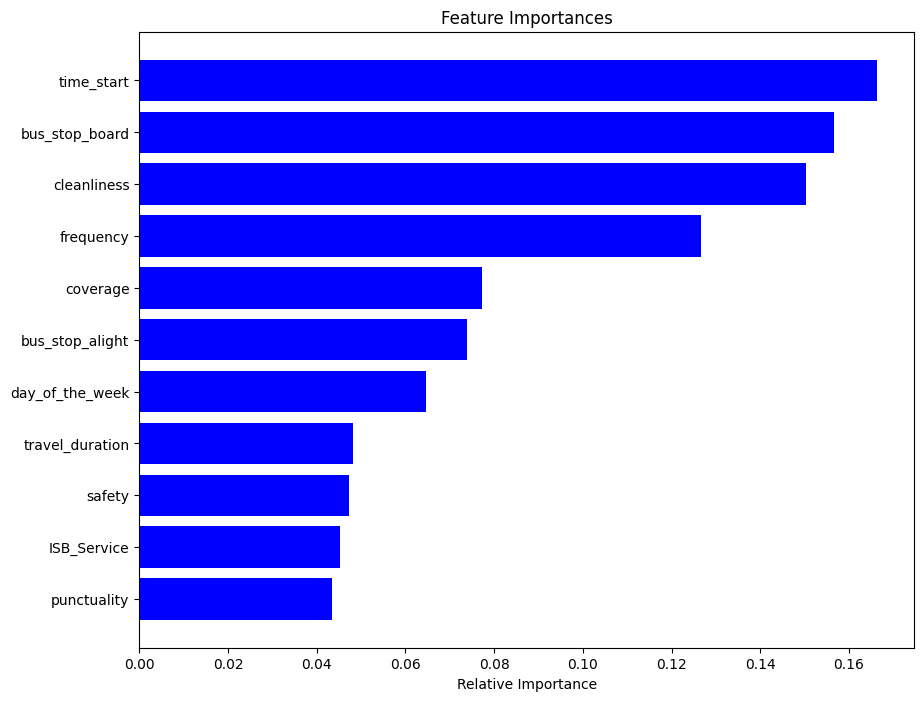

In [7]:
# Random Forest Regression after hyperparameter tuning
predictions = best_model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
r2 = r2_score(y_test, predictions)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared (R²): {r2}")

feature_importances = best_model.feature_importances_
features = X.columns
indices = np.argsort(feature_importances)

plt.figure(figsize=(10, 8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
